In [5]:
from pyforest import *

In [75]:
# Importing the dataset
train_prompts = pd.read_csv('train_prompts.csv')
train_essay = pd.read_csv('train_essays.csv')

test_essay = pd.read_csv('test_essays.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
train_prompts

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [8]:
train_essay

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [9]:
# Merging the two dataframes
train = pd.merge(train_prompts, train_essay, on='prompt_id')
train

<IPython.core.display.Javascript object>

,prompt_id,prompt_name,instructions,source_text,id,text,generated
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",0059830c,Cars. Cars have been around since they became ...,0
1,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",005db917,Transportation is a large necessity in most co...,0
2,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",008f63e3,"""America's love affair with it's vehicles seem...",0
3,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",00940276,How often do you ride in a car? Do you drive a...,0
4,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",00c39458,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...,...,...,...
1373,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,fc66f374,The Electoral College was originally establish...,0
1374,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,fcb87d59,"Dear senator, I think that the presidential el...",0
1375,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,fcd93e2d,The electoral college is a group of electors t...,0
1376,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...,fcfe84cb,An electoral College compromises between elect...,0


In [10]:
# Checking or value counts
train['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='generated', ylabel='count'>

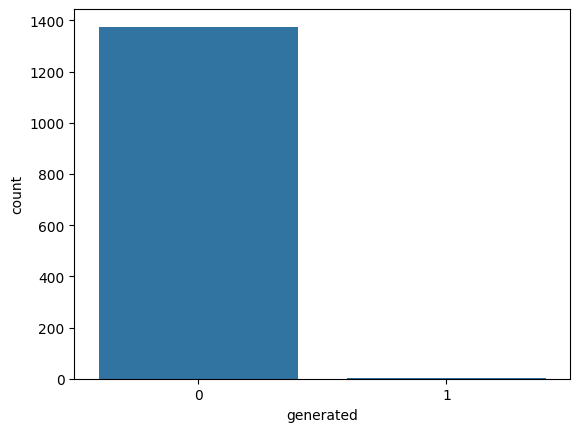

In [11]:
# Histogram for each class of generated column
sns.countplot(x='generated', data=train_essay)

**As There is huge class imbalance between human generated and llm generated essays so we will import some some synthetic llm generated data**

In [12]:
train_essay_ex = pd.read_csv('train_v2_drcat_02.csv')
train_essay_ex 

<IPython.core.display.Javascript object>

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [13]:
# Renaming the lable column
train_essay_ex.rename(columns={'label':'generated'}, inplace=True)
train_essay_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [14]:
# Checking for value counts in external dataset
train_essay_ex['generated'].value_counts()

generated
0    27371
1    17497
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='generated', ylabel='count'>

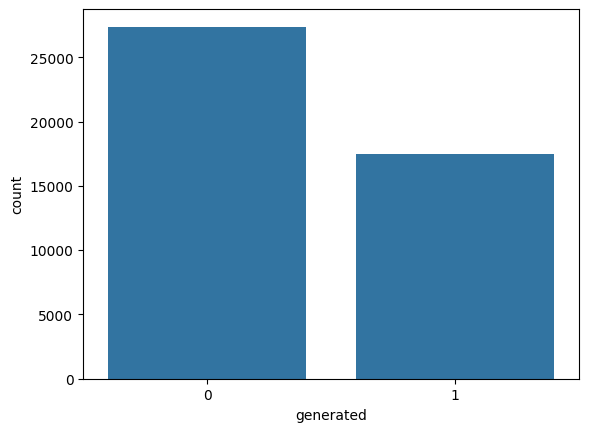

In [15]:
sns.countplot(x='generated', data=train_essay_ex)

In [16]:
# Separating each class of generated column
train_essay_ex_0 = train_essay_ex[train_essay_ex['generated']==0]
train_essay_ex_1 = train_essay_ex[train_essay_ex['generated']==1]

In [17]:
# Downsampling the majority class
train_essay_ex_0 = train_essay_ex_0.sample(n=16300, random_state=42)

In [18]:
# Concatenating the two dataframes
train_essay_ex = pd.concat([train_essay_ex_0, train_essay_ex_1])

<IPython.core.display.Javascript object>

In [19]:
train_essay_ex['generated'].value_counts()

generated
1    17497
0    16300
Name: count, dtype: int64

In [20]:
# Merging the two dataframes
train_final = pd.concat([train[["text","generated"]], train_essay_ex[["text","generated"]]])
train_final

<IPython.core.display.Javascript object>

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


In [21]:
train_final['generated'].value_counts()

generated
0    17675
1    17500
Name: count, dtype: int64

**Now Class imbalance issue is resolved**

In [22]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35175 entries, 0 to 44867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       35175 non-null  object
 1   generated  35175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 824.4+ KB


In [23]:
# Converting the text column to string
train_final['text'] = train_final['text'].convert_dtypes(convert_string=True)

In [24]:
# Preprocessing the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
corpus = []
for i in train_final['text']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aerishgaba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aerishgaba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aerishgaba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['car car around since became famous henry ford created built first modelt car played major role every day life since people starting question limiting car usage would good thing limiting use car might good thing like matter article german suburb life go without car elizabeth rosenthal state automobile linchpin suburb middle class family either shanghai chicago tend make home expert say huge impediment current effort reduce greenhouse gas emission tailpipe passenger car responsible percent greenhouse gas emission europe percent carintensive area united state car main reason greenhouse gas emission lot people driving around time getting need go article paris ban driving due smog robert duffer say paris day nearrecord pollution enforced partial driving ban clear air global city also say monday motorist evennumbered license plate ordered leave car home fined euro fine order would applied oddnumbered plate following day car reason polluting entire city like paris show bad car pollution cau

In [25]:
# Using BERT for feature extraction
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
X = model.encode(corpus)
X.shape

(35175, 768)

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, train_final['generated'], test_size = 0.20, random_state = 42)

In [27]:
# Creating BERT model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(768,)))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               393728    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

Epoch 1/1000


2024-01-15 11:35:51.453507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-01-15 11:35:51.493196: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


880/880 [==============================] - 12s 11ms/step - loss: 0.3776 - accuracy: 0.8313 - val_loss: 0.2302 - val_accuracy: 0.9063
Epoch 2/1000
880/880 [==============================] - 8s 9ms/step - loss: 0.2523 - accuracy: 0.9007 - val_loss: 0.2041 - val_accuracy: 0.9167
Epoch 3/1000
880/880 [==============================] - 9s 10ms/step - loss: 0.2523 - accuracy: 0.9043 - val_loss: 0.3064 - val_accuracy: 0.8907
Epoch 4/1000
880/880 [==============================] - 9s 11ms/step - loss: 1.6783 - accuracy: 0.8459 - val_loss: 2.1926 - val_accuracy: 0.8591
Epoch 5/1000
880/880 [==============================] - 9s 10ms/step - loss: 162.5661 - accuracy: 0.6709 - val_loss: 76.9850 - val_accuracy: 0.6871
Epoch 6/1000
880/880 [==============================] - 8s 9ms/step - loss: 922.5778 - accuracy: 0.6370 - val_loss: 1131.4578 - val_accuracy: 0.5038
Epoch 7/1000
880/880 [==============================] - 8s 9ms/step - loss: 1330.7401 - accuracy: 0.6464 - val_loss: 2612.0566 - val_acc

<IPython.core.display.Javascript object>

220/220 [==============================] - 0s 2ms/step


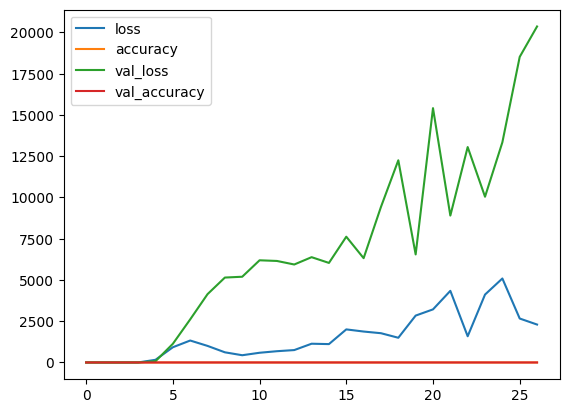

In [28]:
# Fitting the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

# Plotting the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1803 1741]
 [2103 1388]]
              precision    recall  f1-score   support

           0       0.46      0.51      0.48      3544
           1       0.44      0.40      0.42      3491

    accuracy                           0.45      7035
   macro avg       0.45      0.45      0.45      7035
weighted avg       0.45      0.45      0.45      7035



In [30]:
# Creating SVM model and using grid search for hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.502 total time= 4.8min
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.502 total time= 4.8min
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.502 total time= 4.8min
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.502 total time= 4.8min
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.502 total time= 4.7min
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.642 total time= 4.6min
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.648 total time= 4.6min
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.648 total time= 4.6min
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.639 total time= 4.6min
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.652 total time= 4.6min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.943 total time= 2.0min
[CV 2/5] END .................C=0.1, gamma=0.01

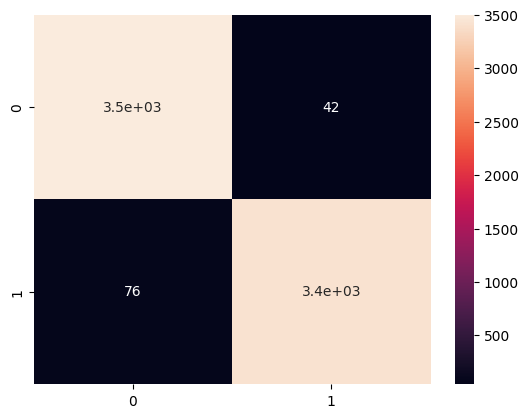

In [31]:
# Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
plt.show()

In [76]:
test_essay.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [77]:
# Using BERT for feature extraction
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
X = model.encode(test_essay['text'])
X.shape

(3, 768)

In [79]:
# Predicting the test set results using SVM
y_pred = grid.predict(X)
y_pred

array([1, 1, 1])

In [82]:
# Adding the prediction to the dataframe
test_essay['Generated'] = y_pred
test_essay

,id,prompt_id,text,Prediction,Generated
0,0000aaaa,2,Aaa bbb ccc.,1,1
1,1111bbbb,3,Bbb ccc ddd.,1,1
2,2222cccc,4,CCC ddd eee.,1,1


In [84]:
# Dropping prediction column
test_essay = test_essay.drop('Prediction', axis=1)
test_essay

,id,prompt_id,text,Generated
0,0000aaaa,2,Aaa bbb ccc.,1
1,1111bbbb,3,Bbb ccc ddd.,1
2,2222cccc,4,CCC ddd eee.,1


In [85]:
# Saving the dataframe into submission.csv
test_essay.to_csv('submission.csv', index=False)